Red Wine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
red_wine_data = pd.read_csv("winequality-red.csv", delimiter =';')
pd.set_option('display.max_column', None)

In [3]:
print( red_wine_data.head() )
print("\n\n")

print(red_wine_data.shape)
print("\n\n")

print(red_wine_data.dtypes)
print("\n\n")

print(red_wine_data.info())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
# Identify zero variance columns
for col in red_wine_data:
    print(col, red_wine_data[col].value_counts().count())
print("\n\n")

fixed acidity 96
volatile acidity 143
citric acid 80
residual sugar 91
chlorides 153
free sulfur dioxide 60
total sulfur dioxide 144
density 436
pH 89
sulphates 96
alcohol 65
quality 6





In [5]:
#  Range of numbers in each column
for i in red_wine_data.columns:
    print("Range of {}: minimum {} & maximum {} " .format(i, red_wine_data[i].min(), red_wine_data[i].max()))# 5. Range of numbers in each column
for i in red_wine_data.columns:
    print("Range of {}: minimum {} & maximum {} " .format(i, red_wine_data[i].min(), red_wine_data[i].max()))

Range of fixed acidity: minimum 4.6 & maximum 15.9 
Range of volatile acidity: minimum 0.12 & maximum 1.58 
Range of citric acid: minimum 0.0 & maximum 1.0 
Range of residual sugar: minimum 0.9 & maximum 15.5 
Range of chlorides: minimum 0.012 & maximum 0.611 
Range of free sulfur dioxide: minimum 1.0 & maximum 72.0 
Range of total sulfur dioxide: minimum 6.0 & maximum 289.0 
Range of density: minimum 0.99007 & maximum 1.00369 
Range of pH: minimum 2.74 & maximum 4.01 
Range of sulphates: minimum 0.33 & maximum 2.0 
Range of alcohol: minimum 8.4 & maximum 14.9 
Range of quality: minimum 3 & maximum 8 
Range of fixed acidity: minimum 4.6 & maximum 15.9 
Range of volatile acidity: minimum 0.12 & maximum 1.58 
Range of citric acid: minimum 0.0 & maximum 1.0 
Range of residual sugar: minimum 0.9 & maximum 15.5 
Range of chlorides: minimum 0.012 & maximum 0.611 
Range of free sulfur dioxide: minimum 1.0 & maximum 72.0 
Range of total sulfur dioxide: minimum 6.0 & maximum 289.0 
Range of den

<Axes: xlabel='quality', ylabel='alcohol'>

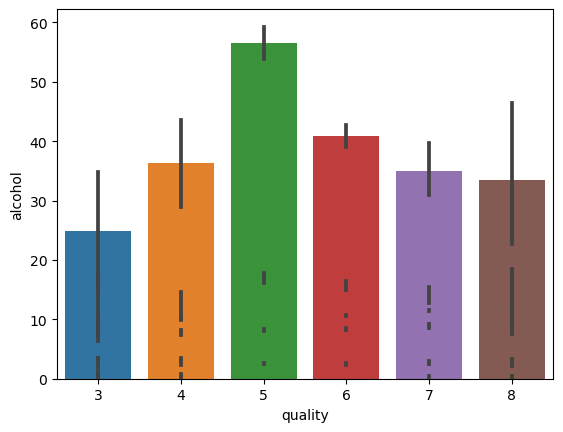

In [6]:
# Relationship between features & the target
# check how the quality is influenced by fixed acidity
sns.barplot(x=red_wine_data['quality'], y=red_wine_data['fixed acidity'])
print("\n\n")

# check how the quality is influenced by volatile acidity
sns.barplot(x=red_wine_data['quality'], y=red_wine_data['volatile acidity'])
print("\n\n")

# check how the quality is influenced by citric acid
sns.barplot(x=red_wine_data['quality'], y=red_wine_data['citric acid'])
print("\n\n")

# check how the quality is influenced by residual sugar
sns.barplot(x=red_wine_data['quality'], y=red_wine_data['residual sugar'])
print("\n\n")

# check how the quality is influenced by chlorides
sns.barplot(x=red_wine_data['quality'], y=red_wine_data['chlorides'])
print("\n\n")

# check how the quality is influenced by free sulfur dioxide
sns.barplot(x=red_wine_data['quality'], y=red_wine_data['free sulfur dioxide'])
print("\n\n")

# check how the quality is influenced by total sulfur dioxide
sns.barplot(x=red_wine_data['quality'], y=red_wine_data['total sulfur dioxide'])
print("\n\n")

# check how the quality is influenced by density
sns.barplot(x=red_wine_data['quality'], y=red_wine_data['density'])
print("\n\n")

# check how the quality is influenced by pH
sns.barplot(x=red_wine_data['quality'], y=red_wine_data['pH'])
print("\n\n")

# check how the quality is influenced by sulphates
sns.barplot(x=red_wine_data['quality'], y=red_wine_data['sulphates'])
print("\n\n")

# check how the quality is influenced by alcohol
sns.barplot(x=red_wine_data['quality'], y=red_wine_data['alcohol'])

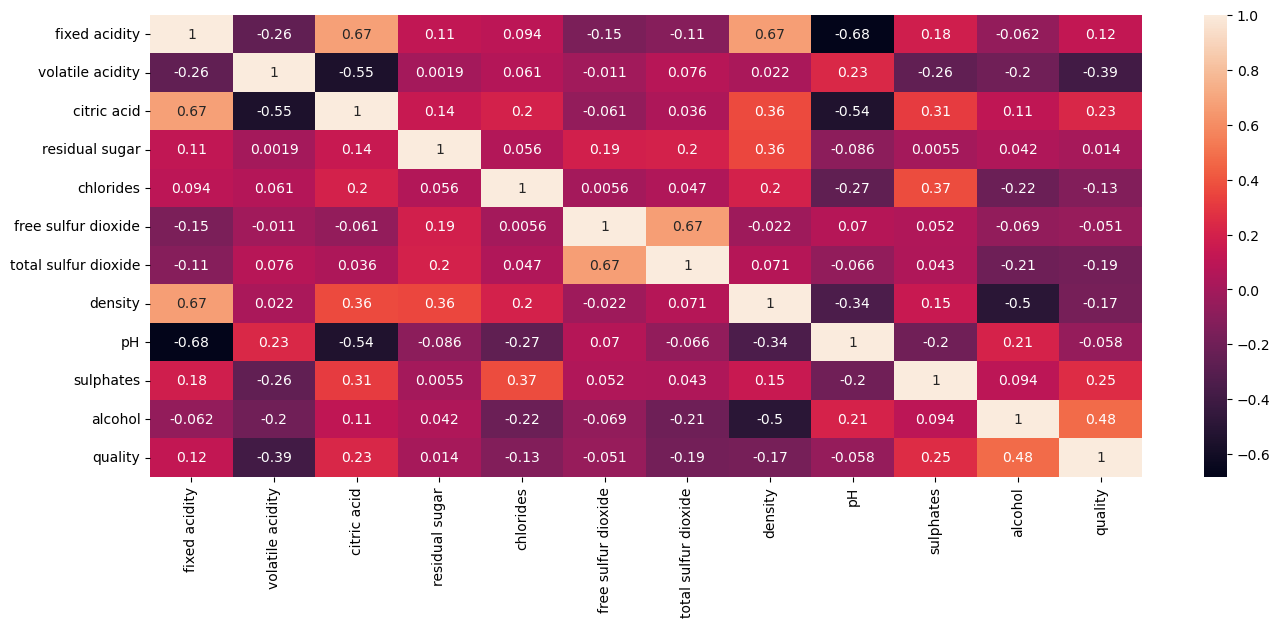

In [7]:
plt.figure(figsize=(16, 6))
sns.heatmap(red_wine_data.corr(), annot=True);

In [8]:
X = red_wine_data.drop('quality',axis=1)
y = red_wine_data['quality']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Model train/test shapes:')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Model train/test shapes:
(1279, 11) (320, 11) (1279,) (320,)


In [10]:
lm_red_wine1 = LinearRegression()
red_model1 = lm_red_wine1.fit(X_train, y_train)

train_predictions = lm_red_wine1.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]

def compare_prediction(y, yhat):
    comp_matrix = pd.DataFrame(zip(y_train,train_prediction), columns = ['Actual', 'Predicted'])
    comp_matrix['Err'] = abs(comp_matrix['Actual']-comp_matrix['Predicted'])
    comp_matrix['PctErr'] = comp_matrix['Err']/comp_matrix['Actual'] * 100
    mean_value = np.mean(comp_matrix['PctErr'])
    return comp_matrix, mean_value

# compare actual and predicted values
comp_matrix, mean = compare_prediction(y, train_prediction)
print("Model prediction comparison and mean error:", comp_matrix, mean)

Model prediction comparison and mean error:       Actual  Predicted  Err     PctErr
0          6          6    0   0.000000
1          6          6    0   0.000000
2          6          6    0   0.000000
3          5          5    0   0.000000
4          5          5    0   0.000000
...      ...        ...  ...        ...
1274       6          6    0   0.000000
1275       6          6    0   0.000000
1276       5          5    0   0.000000
1277       7          7    0   0.000000
1278       6          7    1  16.666667

[1279 rows x 4 columns] 8.055307345768643


In [11]:
accuracy1 = round((100-mean),2)
print('Model accuracy =', accuracy1)

Model accuracy = 91.94


White Wine

In [23]:
white_wine_data = pd.read_csv("winequality-white.csv", delimiter = ';')
print( white_wine_data.head() )

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [13]:
print(white_wine_data.shape)
print("\n\n")

print(white_wine_data.dtypes)
print("\n\n")

print(white_wine_data.info())

(4898, 12)



fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density       

In [14]:
for col in white_wine_data:
    print(col, white_wine_data[col].value_counts().count())

fixed acidity 68
volatile acidity 125
citric acid 87
residual sugar 310
chlorides 160
free sulfur dioxide 132
total sulfur dioxide 251
density 890
pH 103
sulphates 79
alcohol 103
quality 7


In [15]:
for i in white_wine_data.columns:
    print("Range of {}: minimum {} & maximum {} " .format(i, white_wine_data[i].min(), white_wine_data[i].max()))

Range of fixed acidity: minimum 3.8 & maximum 14.2 
Range of volatile acidity: minimum 0.08 & maximum 1.1 
Range of citric acid: minimum 0.0 & maximum 1.66 
Range of residual sugar: minimum 0.6 & maximum 65.8 
Range of chlorides: minimum 0.009 & maximum 0.346 
Range of free sulfur dioxide: minimum 2.0 & maximum 289.0 
Range of total sulfur dioxide: minimum 9.0 & maximum 440.0 
Range of density: minimum 0.98711 & maximum 1.03898 
Range of pH: minimum 2.72 & maximum 3.82 
Range of sulphates: minimum 0.22 & maximum 1.08 
Range of alcohol: minimum 8.0 & maximum 14.2 
Range of quality: minimum 3 & maximum 9 


<Axes: xlabel='quality', ylabel='alcohol'>

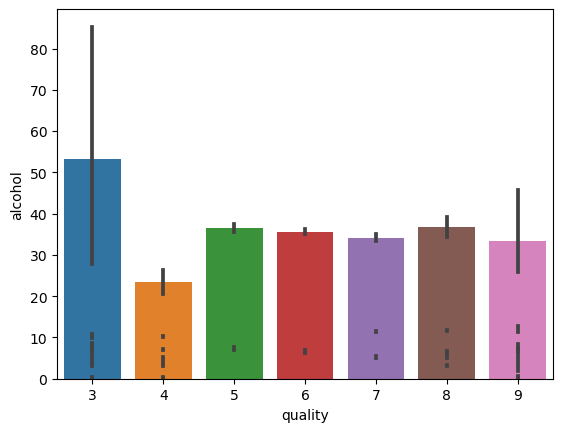

In [16]:
# Relationship between features & the target
# check how the quality is influenced by fixed acidity
sns.barplot(x=white_wine_data['quality'], y=white_wine_data['fixed acidity'])
print("\n\n")

# check how the quality is influenced by volatile acidity
sns.barplot(x=white_wine_data['quality'], y=white_wine_data['volatile acidity'])

# check how the quality is influenced by citric acid
sns.barplot(x=white_wine_data['quality'], y=white_wine_data['citric acid'])

# check how the quality is influenced by residual sugar
sns.barplot(x=white_wine_data['quality'], y=white_wine_data['residual sugar'])

# check how the quality is influenced by chlorides
sns.barplot(x=white_wine_data['quality'], y=white_wine_data['chlorides'])

# check how the quality is influenced by free sulfur dioxide
sns.barplot(x=white_wine_data['quality'], y=white_wine_data['free sulfur dioxide'])

# check how the quality is influenced by density
sns.barplot(x=white_wine_data['quality'], y=white_wine_data['density'])

# check how the quality is influenced by pH
sns.barplot(x=white_wine_data['quality'], y=white_wine_data['pH'])

# check how the quality is influenced by sulphates
sns.barplot(x=white_wine_data['quality'], y=white_wine_data['sulphates'])

# check how the quality is influenced by alcohol
sns.barplot(x=white_wine_data['quality'], y=white_wine_data['alcohol'])

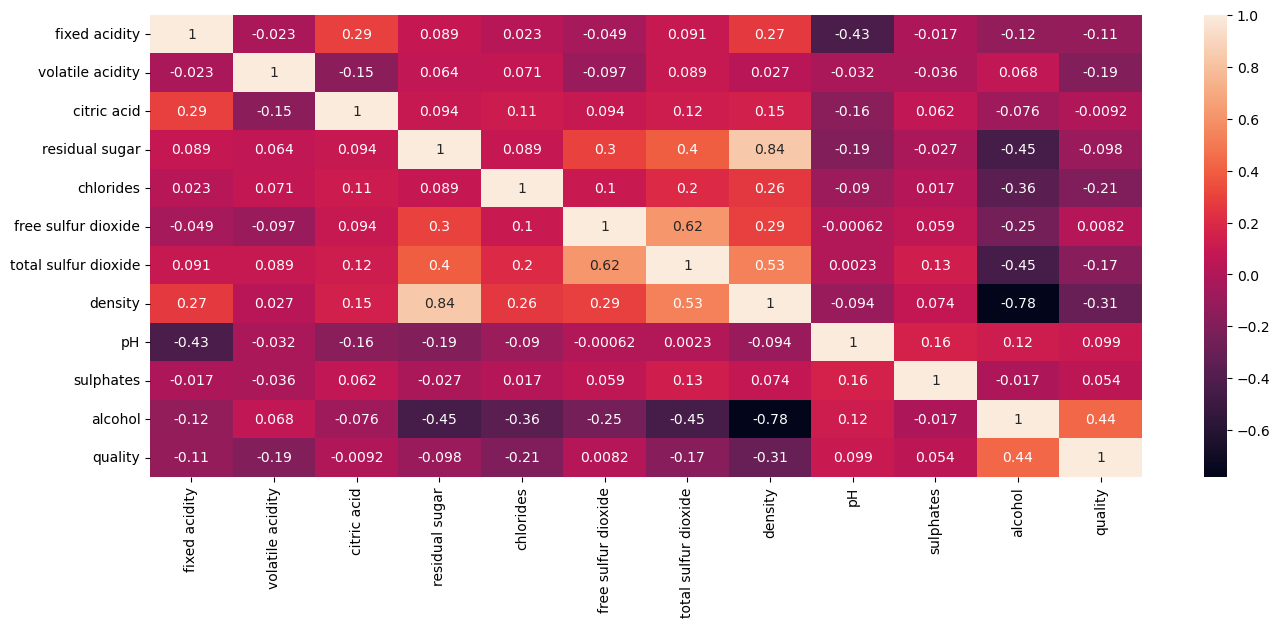

In [17]:
plt.figure(figsize=(16, 6))
sns.heatmap(white_wine_data.corr(), annot=True);

In [18]:
X = white_wine_data.drop('quality',axis=1)
y = white_wine_data['quality']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('White Wine Model train/test shapes:')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

White Wine Model train/test shapes:
(3918, 11) (980, 11) (3918,) (980,)


In [20]:
lm_white_wine1 = LinearRegression()
white_model1 = lm_white_wine1.fit(X_train, y_train)

train_predictions = lm_white_wine1.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]

comp_matrix, mean = compare_prediction(y, train_prediction)
print("White Wine Model prediction comparison and mean error:", comp_matrix, mean)

White Wine Model prediction comparison and mean error:       Actual  Predicted  Err     PctErr
0          6          7    1  16.666667
1          5          6    1  20.000000
2          6          6    0   0.000000
3          7          6    1  14.285714
4          5          6    1  20.000000
...      ...        ...  ...        ...
3913       6          6    0   0.000000
3914       6          6    0   0.000000
3915       6          6    0   0.000000
3916       6          6    0   0.000000
3917       8          6    2  25.000000

[3918 rows x 4 columns] 9.45680092693875


In [21]:
accuracy = round((100-mean),2)
print("White Wine Model accuracy =", accuracy)

White Wine Model accuracy = 90.54
